# "Vehicles."

### _"Recognizing vehicle type from its silhouette" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 19 columns and 846 entries of data about vehicle types.
    
**Метаданные:**
    
* **Class (target)** 

* **COMPACTNESS**

* **CIRCULARITY** 

* **DISTANCE_CIRCULARITY** 

* **RADIUS_RATIO** 

* **PR.AXIS_ASPECT_RATIO** 

* **MAX.LENGTH_ASPECT_RATIO**

* **SCATTER_RATIO** 

* **ELONGATEDNESS** 

* **PR.AXIS_RECTANGULARITY** 

* **MAX.LENGTH_RECTANGULARITY** 

* **SCALED_VARIANCE_MAJOR** 

* **SCALED_VARIANCE_MINOR** 

* **SCALED_RADIUS_OF_GYRATION** 

* **SKEWNESS_ABOUT_MAJOR** 

* **SKEWNESS_ABOUT_MINOR** 

* **KURTOSIS_ABOUT_MAJOR** 

* **KURTOSIS_ABOUT_MINOR** 

* **HOLLOWS_RATIO** 


### Questions:
    
Define vehicle class based on the given datdaset which describes vehicle characteristics (use multi-class classification; check balance of classes; calculate perdictions).


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### 'Class' attribute value counts and visualisation
* ### Label encoder for 'Class' attribute
* ### Vizualisation of all attributes
* ### Correlation plot of each attribute
* ### Correlation list of each attribute
* ### Drop column 'Class'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate model
    * #### SVC 
    * #### Classification report
    * #### Confusion Matrix
    * #### Misclassification plot
    * #### Comparison table between Actual 'Class' and Predicted 'Class'

## [Conclusion](#Conclusion.)

## Part 1: Import, Load Data.

* ### Import libraries

In [1]:
# import standard libraries
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import norm

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from helper import *

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [2]:
# read data from '.csv' file
df = pd.read_csv('vehicles.csv')

# initialisation of target
target = df['Class']

## Part 2: Exploratory Data Analysis.

* ### Info

In [3]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

* ### Head

In [4]:
# preview of the first 5 lines of the loaded data 
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


* ### Describe

In [5]:
df.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


* ### 'Class' attribute value counts and visualisation

Class Value Counts: 
 bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64 

Class Counts Graph: 
 AxesSubplot(0.125,0.125;0.775x0.755)


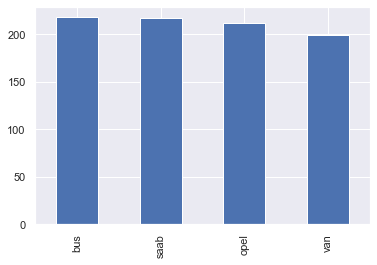

In [6]:
# target attribute value counts
# target attribute visualisation plot
target_calculations(target)

* ### Label encoder for 'Class' attribute

In [7]:
# label encoder for 'Class' attribute
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df['Class'].value_counts()

0    218
2    217
1    212
3    199
Name: Class, dtype: int64

* ###  Vizualisation of all attributes

Attributes: 
 ['Class', 'COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO']


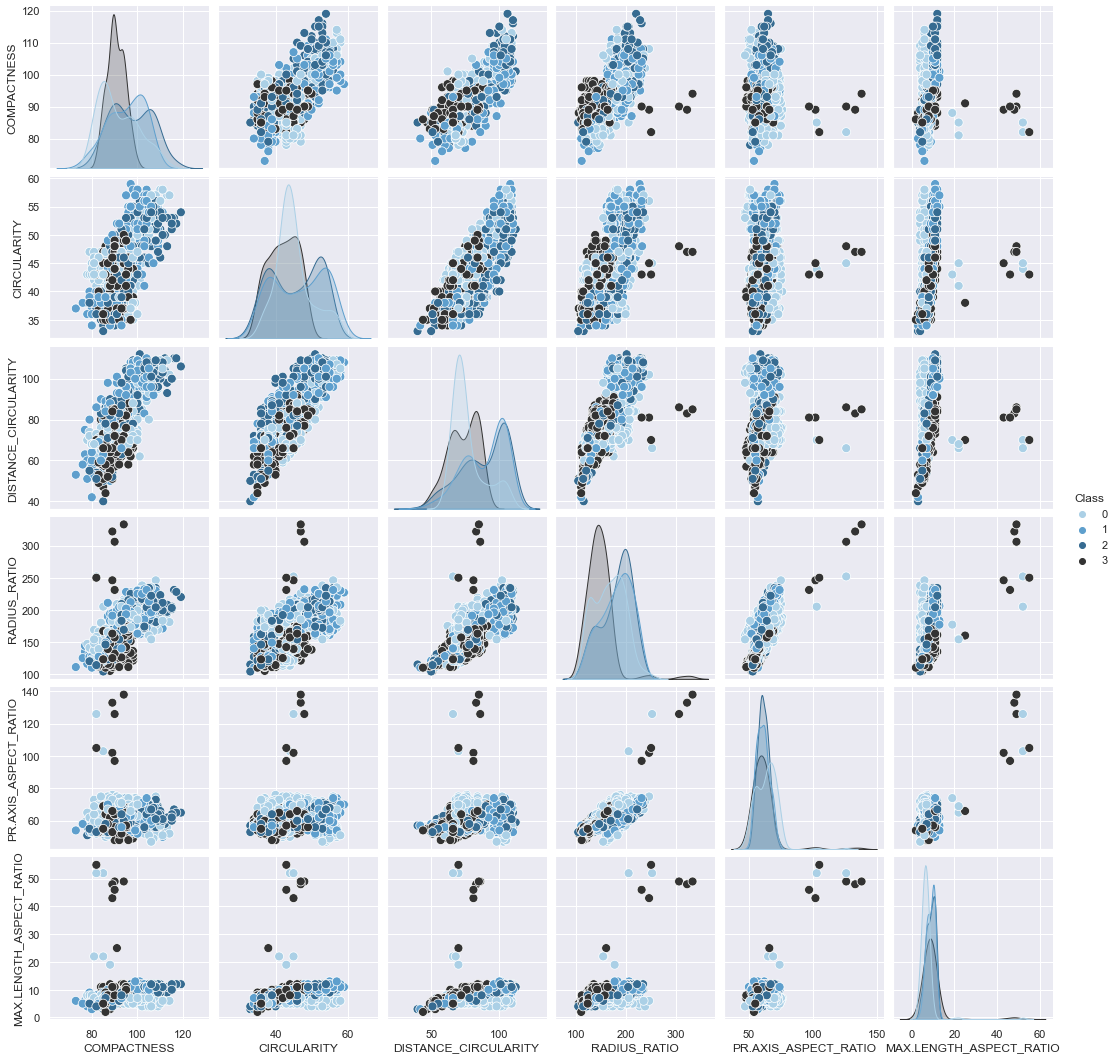

Attributes: 
 ['Class', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR']


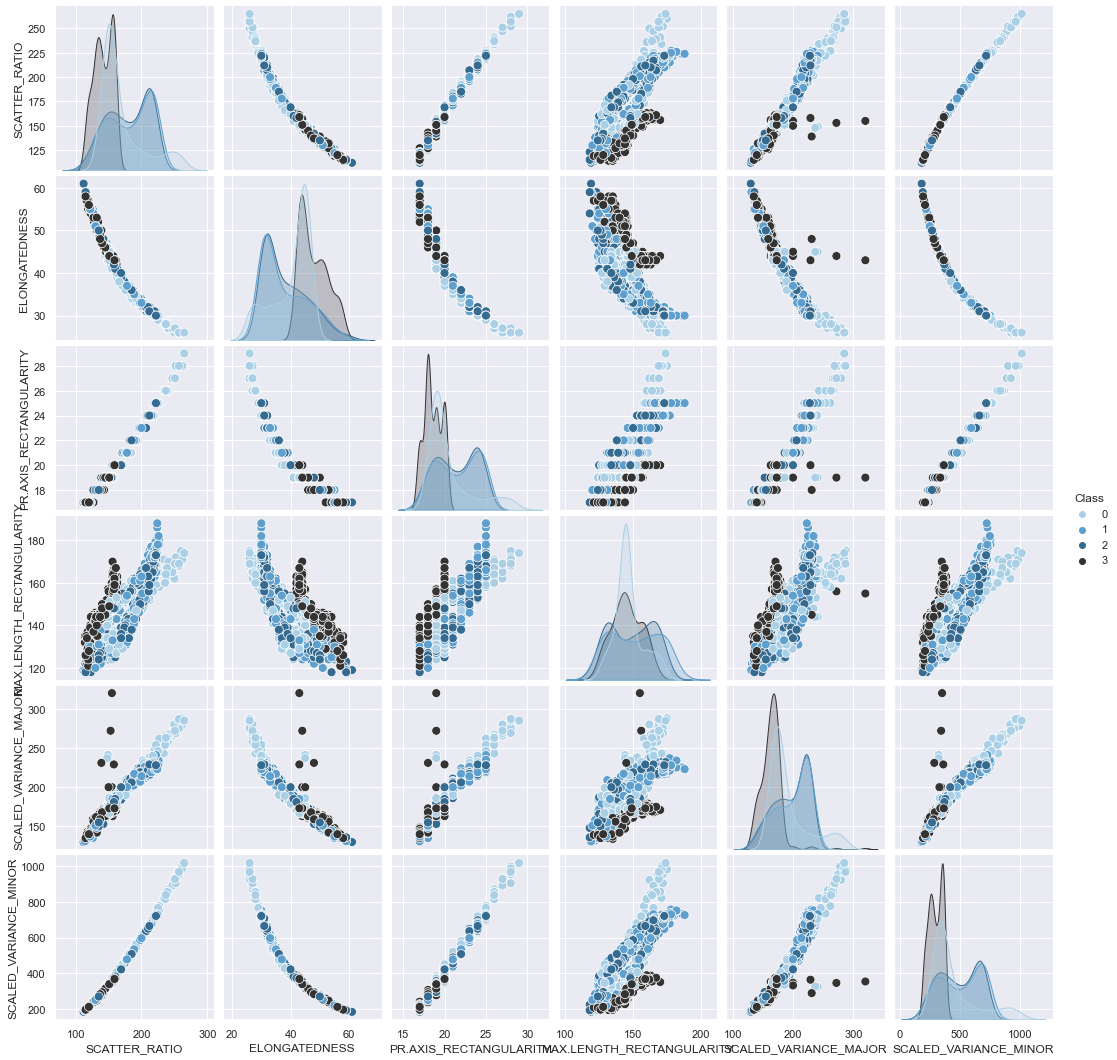

Attributes: 
 ['Class', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO']


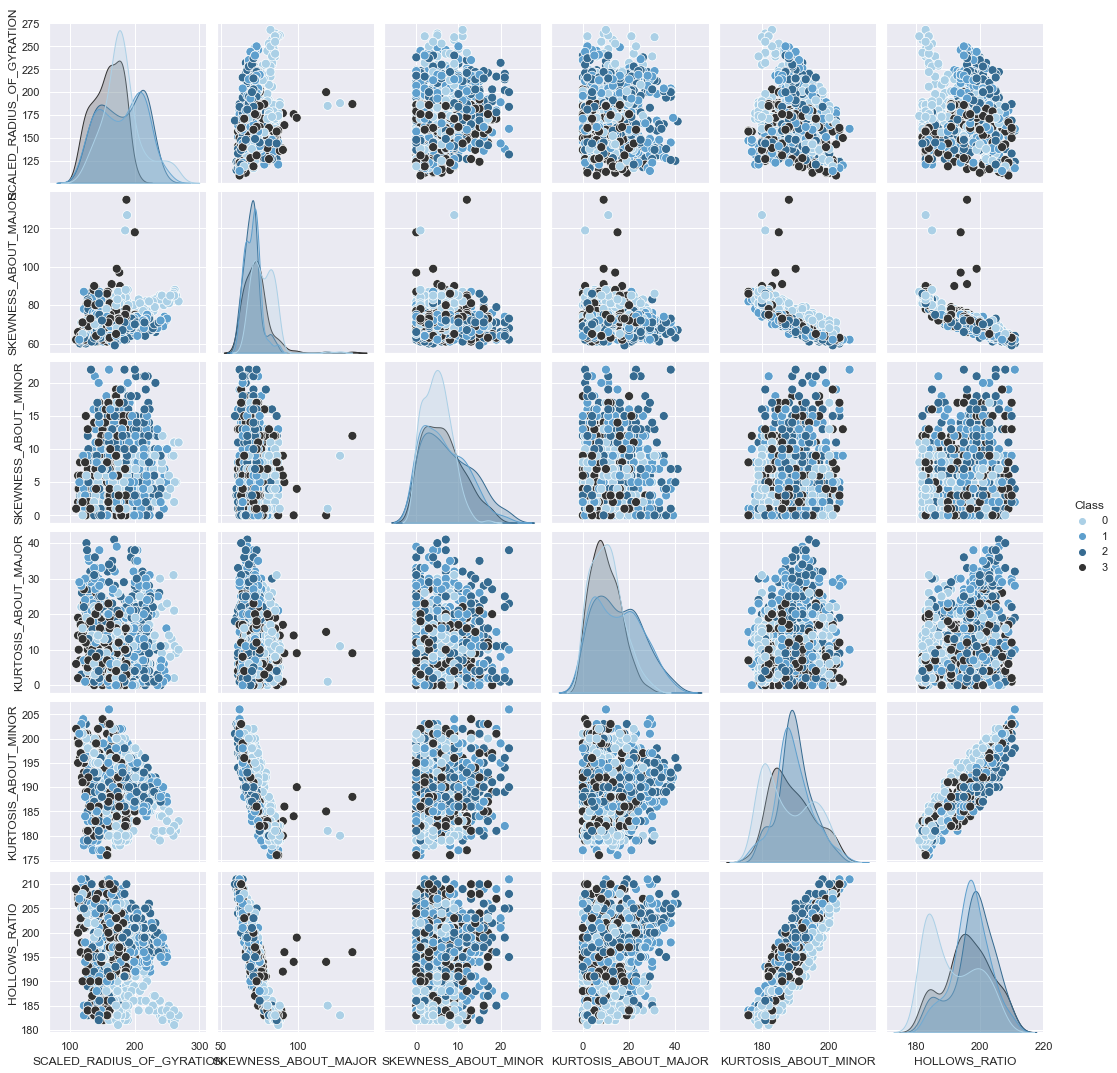

In [8]:
# vizualisation (first part of attributes)
attributes_graph(df, 'Class')

* ###  Correlation plot of each attribute and correlation list of each attribute

Correlation Visualization: 



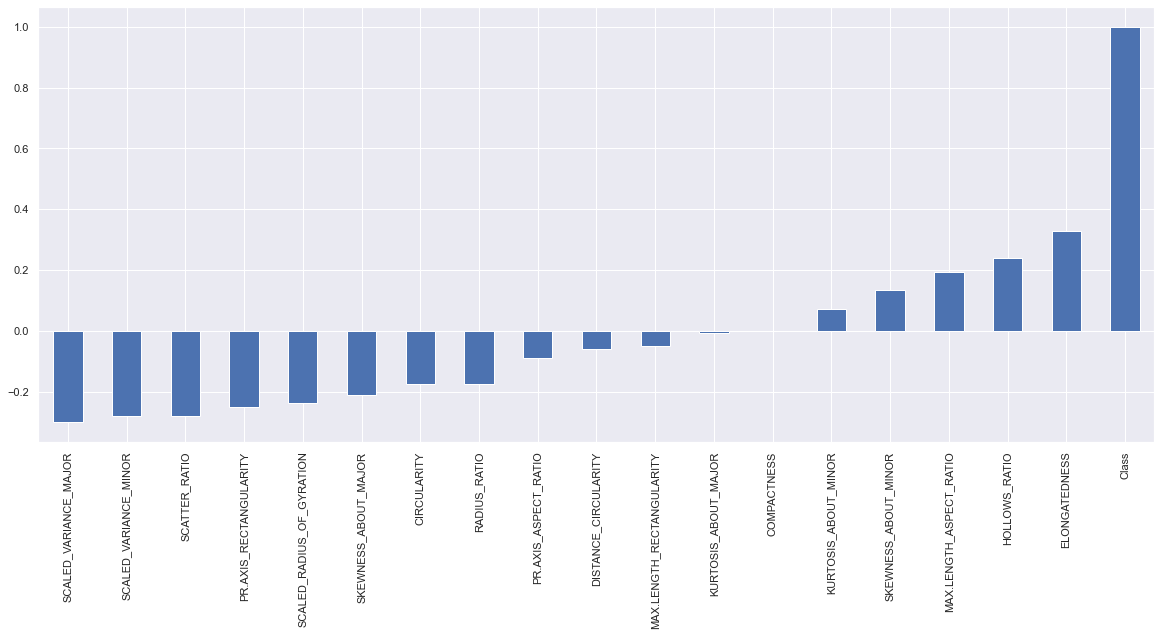



Correlation List: 
 Class                        1.000000
ELONGATEDNESS                0.326903
SCALED_VARIANCE_MAJOR        0.300917
SCALED_VARIANCE_MINOR        0.281097
SCATTER_RATIO                0.280903
PR.AXIS_RECTANGULARITY       0.249787
HOLLOWS_RATIO                0.238360
SCALED_RADIUS_OF_GYRATION    0.237618
SKEWNESS_ABOUT_MAJOR         0.210035
MAX.LENGTH_ASPECT_RATIO      0.195172
CIRCULARITY                  0.174246
RADIUS_RATIO                 0.173949
SKEWNESS_ABOUT_MINOR         0.135965
PR.AXIS_ASPECT_RATIO         0.090462
KURTOSIS_ABOUT_MINOR         0.071960
DISTANCE_CIRCULARITY         0.059804
MAX.LENGTH_RECTANGULARITY    0.050632
KURTOSIS_ABOUT_MAJOR         0.005710
COMPACTNESS                  0.000434
Name: Class, dtype: float64


In [9]:
# correlation plot 
correlation_calculations(df, 'Class')

In [10]:
# correlation list
df.corr().abs()['Class'].sort_values(ascending=False)

Class                        1.000000
ELONGATEDNESS                0.326903
SCALED_VARIANCE_MAJOR        0.300917
SCALED_VARIANCE_MINOR        0.281097
SCATTER_RATIO                0.280903
PR.AXIS_RECTANGULARITY       0.249787
HOLLOWS_RATIO                0.238360
SCALED_RADIUS_OF_GYRATION    0.237618
SKEWNESS_ABOUT_MAJOR         0.210035
MAX.LENGTH_ASPECT_RATIO      0.195172
CIRCULARITY                  0.174246
RADIUS_RATIO                 0.173949
SKEWNESS_ABOUT_MINOR         0.135965
PR.AXIS_ASPECT_RATIO         0.090462
KURTOSIS_ABOUT_MINOR         0.071960
DISTANCE_CIRCULARITY         0.059804
MAX.LENGTH_RECTANGULARITY    0.050632
KURTOSIS_ABOUT_MAJOR         0.005710
COMPACTNESS                  0.000434
Name: Class, dtype: float64

* ### Drop column 'Class'

In [11]:
df = df.drop('Class', axis=1)

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [12]:
# StandardScaler 
df_sc = standartize_values(df.copy())

* ### Creating datasets for ML part

In [13]:
# set 'X' for features' and y' for the target ('Class').
X = df_sc.copy()

y = target

* ### 'Train\Test' split

In [14]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((634, 18), (634,))

In [16]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((212, 18), (212,))

## Part 4: Machine Learning.

* ### Build, train and evaluate model

* SVC model

In [17]:
svc_model = SVC()
SVC_params = {'kernel':['linear','rbf'],
             'C':range(1, 10, 1), 
             'tol': np.arange(0.01, 0.1, 0.01),
             'random_state':[0],
             'decision_function_shape':['ovo', 'ovr']}
SVC_best = GridSearchCV(svc_model, param_grid = SVC_params, n_jobs=-1)
SVC_best.fit(X_train, y_train)
print('SVC гиперпараметры: \n', SVC_best.best_params_)
SVC_preds = SVC_best.predict(X_test)

SVC гиперпараметры: 
 {'C': 9, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'random_state': 0, 'tol': 0.05}


* ### Classification report

In [18]:
print("SVC Classification Report: \n", classification_report(y_test, SVC_preds, digits = 6))

SVC Classification Report: 
               precision    recall  f1-score   support

         bus   0.984375  0.969231  0.976744        65
        opel   0.620000  0.794872  0.696629        39
        saab   0.812500  0.661017  0.728972        59
         van   0.940000  0.959184  0.949495        49

    accuracy                       0.849057       212
   macro avg   0.839219  0.846076  0.837960       212
weighted avg   0.859254  0.849057  0.849960       212



**Conclusions:**
1. SVC model shows a pretty good accuracy that is equal to 0.849057.
2. There were 212 test examples: 65 - class "Bus", 39 - class "Opel", 59 - class "Saab", 49 - class "Van".
3. The best predicted one is class "Bus", then goes class "Van", the third one is class "Saab". The last one is class "Opel".

* ### Confusion matrix

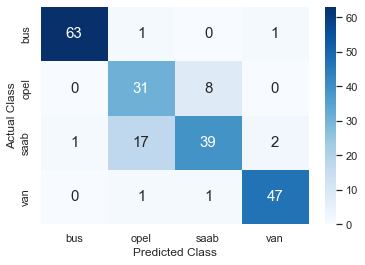

In [19]:
# confusion matrix of SVC model
class_names = ["bus", "opel", "saab", "van"]
confusion_matrix_plot(y_test, SVC_preds, class_names)

* ### Misclassification plot

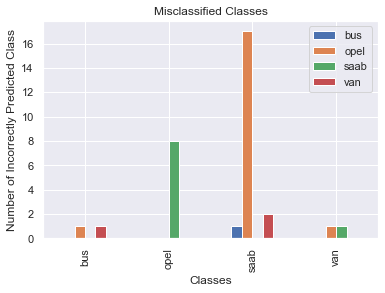

In [20]:
# misclassification vehicle plot 
misclassification_plot(y_test, SVC_preds, class_names)

**Conclusions:**

1. class "Bus": correctly predicted - 63, incorrectly predicted as another class - 1, other classes incorrectly predicted as this class - 2.
2. class "Opel": correctly predicted - 31, incorrectly predicted as another class - 19, other classes incorrectly predicted as this class - 8.
3. class "Saab": correctly predicted - 39, incorrectly predicted as another class - 9, other classes incorrectly predicted as this class - 20.
4. class "Van": correctly predicted - 47, incorrectly predicted as another class - 3, other classes incorrectly predicted as this class - 2.

* ### Comparison table between Actual 'Class' and Predicted 'Class'

In [21]:
# comparison table between Actual 'Class' and Predicted 'Class'
df_comparison = pd.DataFrame({'Actual Class':y_test,'Predicted Class':SVC_preds})
df_comparison.head(10)

,Actual Class,Predicted Class
39,bus,bus
250,van,van
314,bus,bus
96,saab,opel
198,bus,bus
110,van,van
328,van,van
306,saab,saab
433,bus,bus
428,saab,saab


##  Conclusion.

In [22]:
# submission of .csv file with test predictions
submission_data = pd.DataFrame()
submission_data['ID'] = X_test.index
submission_data['Class'] = SVC_preds
submission_data.to_csv('VehiclesPredictionsTest', index=False)

**Question:**

Define vehicle class based on the given datdaset which describes vehicle characteristics (use multi-class classification; check balance of classes; calculate perdictions).


**Answers:**

1. Multi-class classification was applied.
2. Classes were balanced in our dataset. 
3. SVC model was used for ML process.
4. Result: 
    * Train/Test split: test_size=0.25, random_state=45;
    * SVC linear model shows a pretty good accuracy that is equal to 0.849057.
    * Сonfusion matrix shows that 180 out of 214 examples were correctly predicted.
    * Сonfusion matrix also shows that the best predicted classes are "Van" and "Bus". Classes "Saab" and "Opel" are not predicted perfectly.
    
**Ideas:**

It seems that "Saab" and "Opel" have every imilar values for the given vehicle characteristics. Other features, which can distinguish these classes better, should be added to the dataset.